## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [4]:
# Importing all datasets
churn_data = pd.read_csv(r"D:\UPG_Machine_Learning\Machine learning Module\Logistic Regression\Telecom Churn\churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_data = pd.read_csv(r"D:\UPG_Machine_Learning\Machine learning Module\Logistic Regression\Telecom Churn\customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
internet_data = pd.read_csv(r"D:\UPG_Machine_Learning\Machine learning Module\Logistic Regression\Telecom Churn\internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [7]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [9]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


In [10]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [11]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [12]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [13]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [15]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,False,False,False,True,False,False,True,False


In [17]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis=1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [18]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No,True,False,False,False,True,True,False,False,True,False,False,True,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No,False,False,False,False,True,True,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False


#### Dropping the repeated variables

In [19]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [20]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [21]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = telecom['TotalCharges'].replace(' ', '0').astype(float)       #due to presence of " char we replace it by 0

In [22]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [23]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [24]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147,2279.734304
std,24.559481,30.090047,0.368612,2266.794470
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.500000,0.000000,398.550000
50%,29.000000,70.350000,0.000000,1394.550000
75%,55.000000,89.850000,0.000000,3786.600000
90%,69.000000,102.600000,1.000000,5973.690000
95%,72.000000,107.400000,1.000000,6921.025000
99%,72.000000,114.729000,1.000000,8039.256000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [25]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

Now we don't have any missing values

### Step 4: Test-Train Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,False,False,True,True,False,False,True,False,False,True,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,False,False,True,True,False,False,True,False,False,True,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False


In [28]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [29]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
877,0.754422,0,0,-0.145568,0.350963,0,0,1,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False,True,False,True
5792,-0.710751,1,1,1.051796,-0.377957,1,0,0,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,True,True,False,False,True
5334,0.673024,1,1,1.437668,1.329866,0,1,1,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
878,1.120716,1,0,0.006794,0.776103,0,0,0,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False,True,False,True,True,False,True,False
6578,-0.914247,1,0,0.298268,-0.701925,0,0,1,True,False,True,False,False,False,False,False,False,True,False,True,True,False,False,True,False,True,True,False,False,True


In [32]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.536987079369588

We have almost **27%**  churn rate which shows that the data is not highly imbalanced.

### Step 6: Looking at Correlations

In [33]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

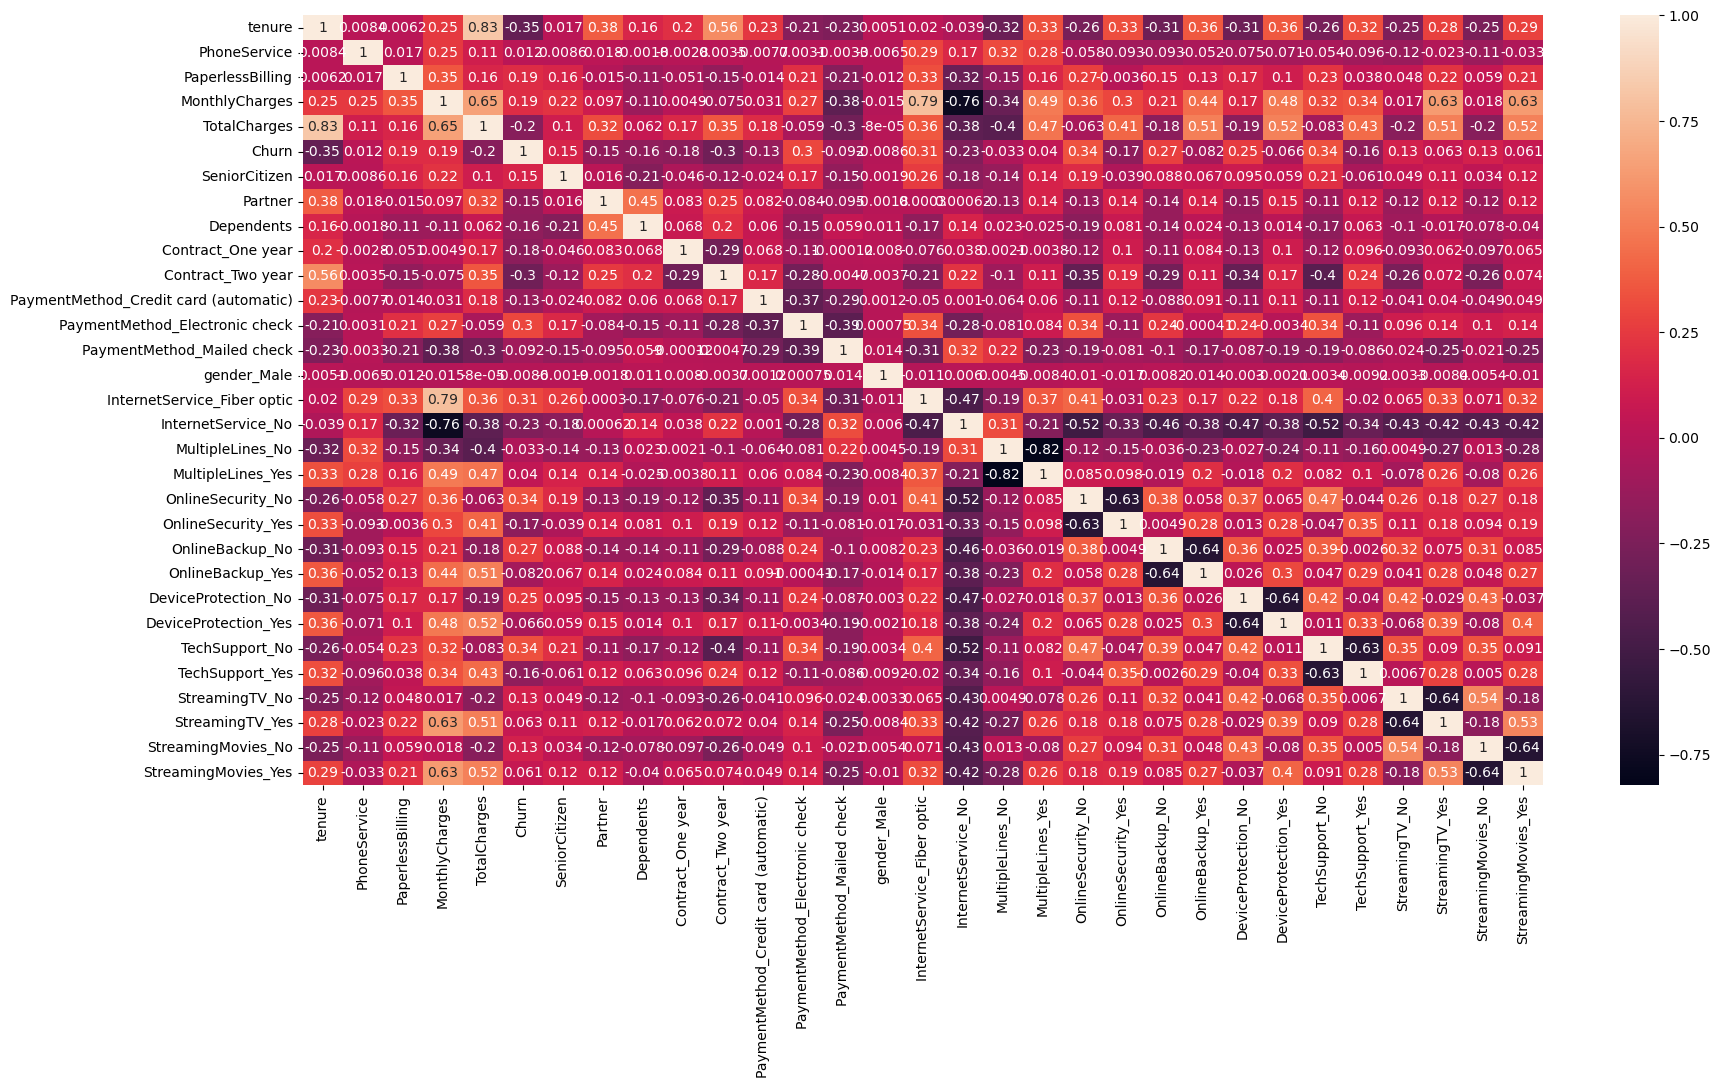

In [34]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(numeric_only = True),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [35]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis =1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis = 1)

In [36]:
X_train.shape

(4930, 23)

#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

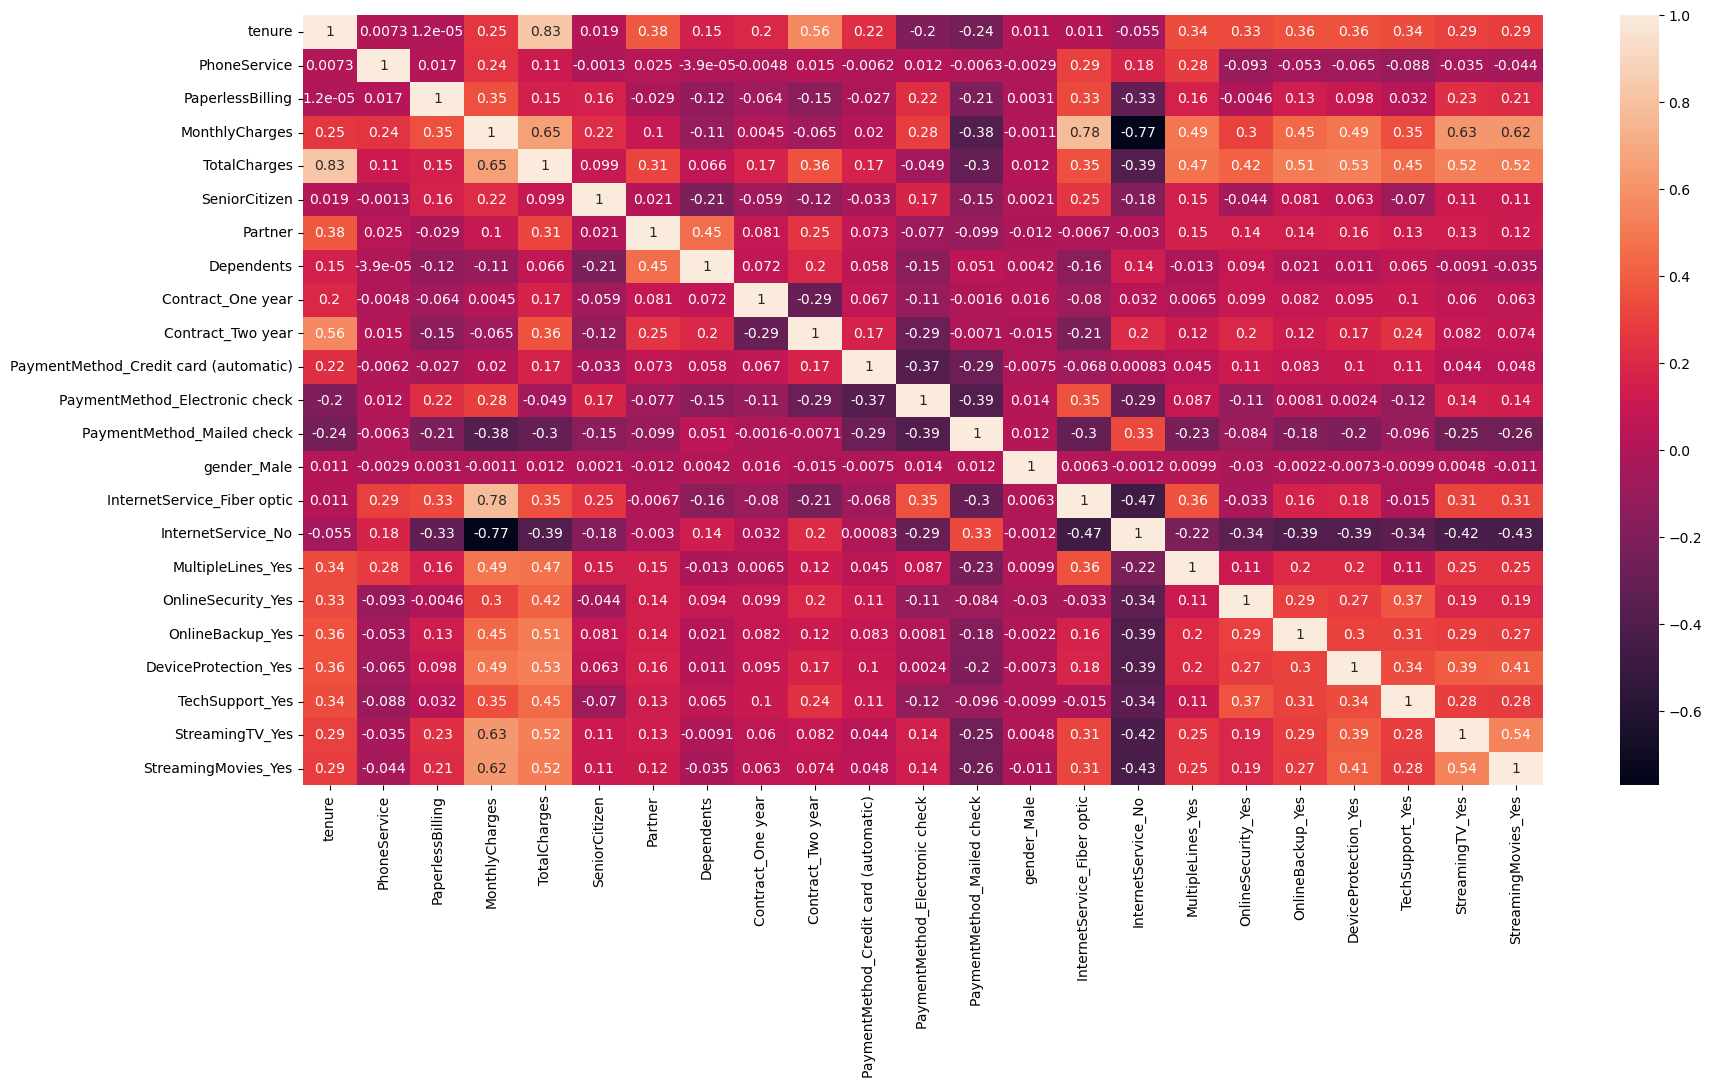

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [38]:
import statsmodels.api as sm

In [39]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train.astype(float))), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sat, 29 Jun 2024   Deviance:                       4016.1
Time:                        21:31:21   Pearson chi2:                 5.77e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2885
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9889      1.532     -1.952      0.051      -5.991       0.013
tenure                                   -1.3441      0.179     -7.500      0.000      -1.695      -0.993
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
MonthlyCharges                           -1.5336      1.162     -1.320      0.187      -3.812       0.744
TotalCharges                              0.6103      0.190      3.215      0.001       0.238       0.982
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
=========================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [41]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step =15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [42]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True, False, False])

In [43]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 2),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 2),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 2),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', False, 2),
 ('StreamingMovies_Yes', False, 2)]

In [44]:
col = X_train.columns[rfe.support_]

In [45]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'gender_Male',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [46]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4918
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2037.8
Date:                Sat, 29 Jun 2024   Deviance:                       4075.6
Time:                        21:31:22   Pearson chi2:                 6.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2799
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0951      0.151     -7.252      0.000      -1.391      -0.799
tenure                         -1.4422      0.171     -8.459      0.000      -1.776      -1.108
PhoneService                   -0.6987      0.155     -4.498      0.000      -1.003      -0.394
PaperlessBilling                0.4164      0.088      4.708      0.000       0.243       0.590
TotalCharges                    0.6480      0.172      3.776      0.000       0.312       0.984
SeniorCitizen                   0.3669      0.099      3.694      0.000       0.172       0.561
Contract_One year              -0.7253      0.127     -5.723      0.000      -0.974      -0.477
Contract_Two year              -1.4555      0.205     -7.104      0.000      -1.857      -1.054
InternetService_Fiber optic     0.9356      0.115      8.121      0.000       0.710       1.161
InternetService_No             -0.8947      0.157     -5.687      0.000      -1.203      -0.586
MultipleLines_Yes               0.3214      0.095      3.376      0.001       0.135       0.508
TechSupport_Yes                -0.5436      0.103     -5.288      0.000      -0.745      -0.342
===============================================================================================
"""

In [47]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm.astype(float))
y_train_pred[:10]

877     0.038250
5792    0.540296
5334    0.097227
878     0.020741
6578    0.132664
3090    0.457945
3043    0.699615
5028    0.037954
4463    0.683876
2822    0.098119
dtype: float64

In [48]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03824965, 0.54029611, 0.09722689, 0.02074082, 0.13266445,
       0.45794499, 0.69961481, 0.03795406, 0.68387617, 0.09811946])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [49]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.038250,877
1,1,0.540296,5792
2,1,0.097227,5334
3,0,0.020741,878
4,0,0.132664,6578


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [50]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.038250,877,0
1,1,0.540296,5792,1
2,1,0.097227,5334,0
3,0,0.020741,878,0
4,0,0.132664,6578,0


In [51]:
from sklearn import metrics

In [52]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3249  378]
 [ 580  723]]


In [53]:
# Predicted     not_churn    churn
# Actual
# not_churn        3249      378
# churn            580       723  

In [54]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8056795131845842


#### Checking VIFs

In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,7.99
3,TotalCharges,6.70
0,tenure,6.23
7,InternetService_Fiber optic,3.76
6,Contract_Two year,3.02
8,InternetService_No,2.95
2,PaperlessBilling,2.58
9,MultipleLines_Yes,2.51
10,TechSupport_Yes,1.99
5,Contract_One year,1.82


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [57]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'TechSupport_Yes'],
      dtype='object')

In [58]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4919
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.9
Date:                Sat, 29 Jun 2024   Deviance:                       4095.7
Time:                        21:31:23   Pearson chi2:                 5.78e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2769
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5445      0.116    -13.322      0.000      -1.772      -1.317
tenure                         -1.3132      0.168     -7.806      0.000      -1.643      -0.983
PaperlessBilling                0.4191      0.088      4.756      0.000       0.246       0.592
TotalCharges                    0.5328      0.170      3.135      0.002       0.200       0.866
SeniorCitizen                   0.3976      0.099      4.016      0.000       0.204       0.592
Contract_One year              -0.7372      0.126     -5.829      0.000      -0.985      -0.489
Contract_Two year              -1.4505      0.205     -7.090      0.000      -1.851      -1.050
InternetService_Fiber optic     0.7625      0.107      7.145      0.000       0.553       0.972
InternetService_No             -1.1214      0.148     -7.598      0.000      -1.411      -0.832
MultipleLines_Yes               0.2525      0.093      2.715      0.007       0.070       0.435
TechSupport_Yes                -0.5544      0.102     -5.409      0.000      -0.755      -0.353
===============================================================================================
"""

In [59]:
y_train_pred = res.predict(X_train_sm.astype(float)).values.reshape(-1)

In [60]:
y_train_pred[:10]

array([0.02558759, 0.55287536, 0.09191903, 0.02553883, 0.14716705,
       0.50789663, 0.5942737 , 0.038289  , 0.68953177, 0.11335427])

In [61]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [62]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.025588,877,0
1,1,0.552875,5792,1
2,1,0.091919,5334,0
3,0,0.025539,878,0
4,0,0.147167,6578,0


In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8028397565922921


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,6.68
0,tenure,6.05
6,InternetService_Fiber optic,2.82
5,Contract_Two year,2.73
1,PaperlessBilling,2.33
7,InternetService_No,2.24
8,MultipleLines_Yes,2.24
9,TechSupport_Yes,1.83
4,Contract_One year,1.64
3,SeniorCitizen,1.29


In [66]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_Yes',
       'TechSupport_Yes'],
      dtype='object')

In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4920
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.0
Date:                Sat, 29 Jun 2024   Deviance:                       4106.0
Time:                        21:35:05   Pearson chi2:                 5.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2754
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.5819      0.114    -13.864      0.000      -1.805      -1.358
tenure                         -0.8319      0.062    -13.451      0.000      -0.953      -0.711
PaperlessBilling                0.4214      0.088      4.791      0.000       0.249       0.594
SeniorCitizen                   0.4028      0.099      4.054      0.000       0.208       0.598
Contract_One year              -0.7140      0.125     -5.691      0.000      -0.960      -0.468
Contract_Two year              -1.4009      0.202     -6.925      0.000      -1.797      -1.004
InternetService_Fiber optic     0.9191      0.094      9.754      0.000       0.734       1.104
InternetService_No             -1.1584      0.146     -7.921      0.000      -1.445      -0.872
MultipleLines_Yes               0.3042      0.091      3.335      0.001       0.125       0.483
TechSupport_Yes                -0.4979      0.101     -4.930      0.000      -0.696      -0.300
===============================================================================================
"""

In [76]:
y_train_pred = res.predict(X_train_sm.astype(float)).values.reshape(-1)

In [77]:
y_train_pred[:10]

array([0.0316324 , 0.56336464, 0.08349348, 0.03161762, 0.1507197 ,
       0.47623151, 0.5680249 , 0.02992141, 0.69507926, 0.1125885 ])

In [78]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [79]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.031632,877,0
1,1,0.563365,5792,1
2,1,0.083493,5334,0
3,0,0.031618,878,0
4,0,0.150720,6578,0


In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.7989858012170385


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [82]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].astype(float).values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.69
5,InternetService_Fiber optic,2.41
1,PaperlessBilling,2.30
7,MultipleLines_Yes,2.19
0,tenure,1.80
8,TechSupport_Yes,1.76
6,InternetService_No,1.75
3,Contract_One year,1.63
2,SeniorCitizen,1.29


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [83]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3256,  371],
       [ 620,  683]], dtype=int64)

In [ ]:
# Actual/Predicted     not_churn    churn
        # not_churn        3256      371
        # churn            620       683  

In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.7989858012170385

## Deploying metrics other than accuracy

In [85]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [86]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5241749808135073

In [87]:
# Let us calculate specificity
TN / float(TN+FP)

0.8977116073890268

In [88]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10228839261097325


In [89]:
# positive predictive value 
print (TP / float(TP+FP))

0.6480075901328273


In [90]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8400412796697626


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

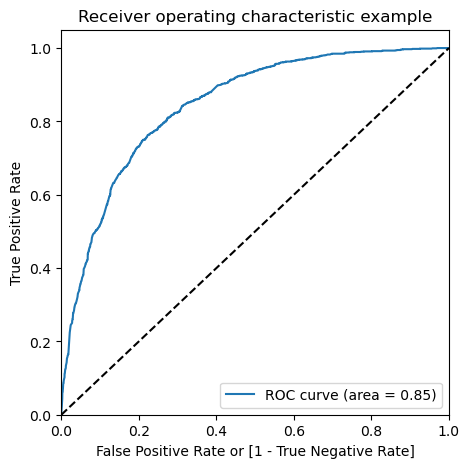

In [93]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.031632,877,0,1,0,0,0,0,0,0,0,0,0
1,1,0.563365,5792,1,1,1,1,1,1,1,0,0,0,0
2,1,0.083493,5334,0,1,0,0,0,0,0,0,0,0,0
3,0,0.031618,878,0,1,0,0,0,0,0,0,0,0,0
4,0,0.150720,6578,0,1,1,0,0,0,0,0,0,0,0


In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.264300  1.000000  0.000000
0.1   0.1  0.608722  0.941673  0.489109
0.2   0.2  0.715416  0.853415  0.665840
0.3   0.3  0.765112  0.771297  0.762889
0.4   0.4  0.795538  0.668457  0.841191
0.5   0.5  0.798986  0.524175  0.897712
0.6   0.6  0.794726  0.381427  0.943204
0.7   0.7  0.766126  0.165004  0.982079
0.8   0.8  0.743002  0.031466  0.998621
0.9   0.9  0.735700  0.000000  1.000000


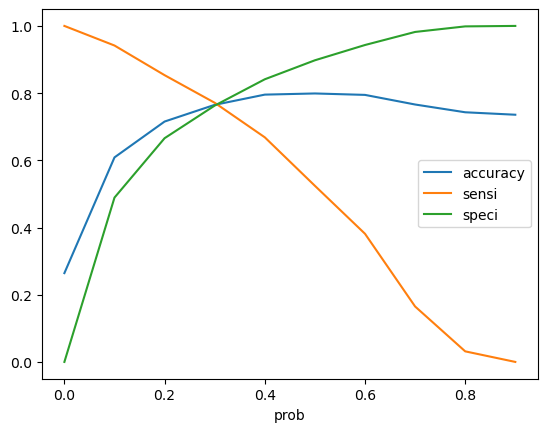

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.031632,877,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.563365,5792,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.083493,5334,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.031618,878,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.150720,6578,0,1,1,0,0,0,0,0,0,0,0,0


In [98]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7651115618661257

In [99]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2767,  860],
       [ 298, 1005]], dtype=int64)

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7712970069071374

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.7628894403087951

In [103]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23711055969120484


In [104]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5388739946380697


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9027732463295269


## Precision and Recall

In [ ]:
#Looking at the confusion matrix again

In [106]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3256,  371],
       [ 620,  683]], dtype=int64)

##### Precision
TP / TP + FP

In [107]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6480075901328273

##### Recall
TP / TP + FN

In [108]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5241749808135073

Using sklearn utilities for the same

In [109]:
from sklearn.metrics import precision_score, recall_score

In [110]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
precision for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and precision for both classes are computed, then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
precision for all `labels` 

In [111]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6480075901328273

In [112]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5241749808135073

### Precision and recall tradeoff

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 4925    0
 4926    1
 4927    0
 4928    1
 4929    1
 Name: Churn, Length: 4930, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 4925    0
 4926    0
 4927    0
 4928    1
 4929    1
 Name: predicted, Length: 4930, dtype: int64)

In [115]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

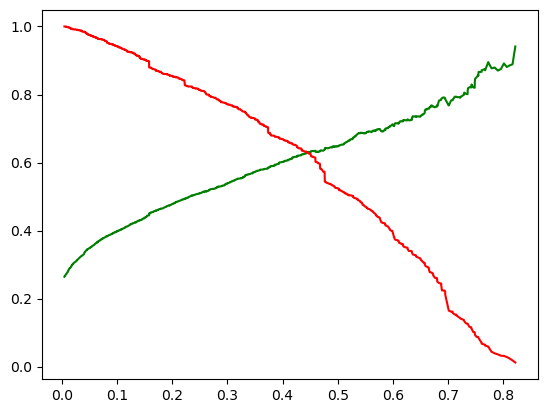

In [116]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [117]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [118]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes
4880,0.713723,0,0,False,True,False,True,False,False
1541,1.609107,0,0,False,True,False,True,False,False
1289,1.242814,0,0,True,False,False,False,True,True
5745,1.161415,1,0,False,True,False,True,True,False
4873,-1.036345,0,0,False,False,False,True,False,False


In [120]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [121]:
y_test_pred = res.predict(X_test_sm.astype(float))

In [122]:
y_test_pred[:10]

4880    0.008707
1541    0.004153
1289    0.028651
5745    0.012350
4873    0.132610
4168    0.017542
1557    0.340455
2892    0.157769
664     0.006882
1588    0.207508
dtype: float64

In [123]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [124]:
# Let's see the head
y_pred_1.head()

,0
4880,0.008707
1541,0.004153
1289,0.028651
5745,0.012350
4873,0.132610


In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [126]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
y_pred_final.head()

,Churn,CustID,0
0,0,4880,0.008707
1,0,1541,0.004153
2,0,1289,0.028651
3,0,5745,0.012350
4,0,4873,0.132610


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [136]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [137]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,4880,0,0.008707
1,1541,0,0.004153
2,1289,0,0.028651
3,5745,0,0.012350
4,4873,0,0.132610


In [138]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [139]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,4880,0,0.008707,0
1,1541,0,0.004153,0
2,1289,0,0.028651,0
3,5745,0,0.012350,0
4,4873,0,0.132610,0


In [140]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7695220066256507

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1278,  269],
       [ 218,  348]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6148409893992933

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.826115061409179